Import required libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Load the Data from the CSV

In [123]:
# filePath = 'C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/AceOrders2324.csv'
# filePath = 'C:/Users/wasim/Downloads/orders-2024-10-09-12-09-21.csv'
OrderData = pd.read_csv('C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/Orders2324.csv')
OrderData.head()

,Order Number,Order Status,Order Date,First Name (Billing),Last Name (Billing),Company (Billing),Address 1&2 (Billing),City (Billing),State Code (Billing),Postcode (Billing),...,Payment Method Title,Category,Product Name,Cart Discount Amount,Order Subtotal Amount,Shipping Method Title,Order Shipping Amount,Order Refund Amount,Order Total Amount,Discount Amount
0,14132,Completed,9/30/2024 18:13,Christine,Sanchez,Sanchez Here Productions LLC,5150 Marton Road,Ann Arbor,MI,48108,...,PayPal - sanchezhereproductions@gmail.com,"Custom Mix Ink (PMS),Ink,Screen Printing",Custom Mix Ink (PMS) - Quart,0.0,140.0,UPS® Ground,15.79,0.0,155.79,NaN
1,14132,Completed,9/30/2024 18:13,Christine,Sanchez,Sanchez Here Productions LLC,5150 Marton Road,Ann Arbor,MI,48108,...,PayPal - sanchezhereproductions@gmail.com,"Custom Mix Ink (PMS),Ink,Screen Printing",Custom Mix Ink (PMS) - Quart,0.0,140.0,UPS® Ground,15.79,0.0,155.79,NaN
2,14132,Completed,9/30/2024 18:13,Christine,Sanchez,Sanchez Here Productions LLC,5150 Marton Road,Ann Arbor,MI,48108,...,PayPal - sanchezhereproductions@gmail.com,"Custom Mix Ink (PMS),Ink,Screen Printing",Custom Mix Ink (PMS) - Quart,0.0,140.0,UPS® Ground,15.79,0.0,155.79,NaN
3,14132,Completed,9/30/2024 18:13,Christine,Sanchez,Sanchez Here Productions LLC,5150 Marton Road,Ann Arbor,MI,48108,...,PayPal - sanchezhereproductions@gmail.com,"Custom Mix Ink (PMS),Ink,Screen Printing",Custom Mix Ink (PMS) - Quart,0.0,140.0,UPS® Ground,15.79,0.0,155.79,NaN
4,14131,Completed,9/30/2024 17:58,Jessica,Mobley,DESIGN 2 WEAR 2 LLC,1112 Central Ave,Middletown,OH,45044-4011,...,PayPal - design2wear2@yahoo.com,"Easyweed HTV 15"" Fluorescent Yard,Heat Transfe...","EasyWeed® HTV 15"" Fluorescent PINK Yard",75.0,242.5,UPS® Ground,10.69,0.0,178.19,75.0


Data Cleaning and Preprocessing

In [124]:
# Checking for missing values
print(OrderData.isnull().sum())

# Dropping rows with missing Order Total amounts
OrderData = OrderData.dropna(subset=['Order Total Amount'])

# Converting 'Order Date' to datetime format
OrderData['Order Date'] = pd.to_datetime(OrderData['Order Date'])



Order Number                  0
Order Status                  0
Order Date                    0
First Name (Billing)          0
Last Name (Billing)           0
Company (Billing)           645
Address 1&2 (Billing)         0
City (Billing)                0
State Code (Billing)          0
Postcode (Billing)            0
Country Code (Billing)        0
Email (Billing)               0
Phone (Billing)               0
First Name (Shipping)         0
Last Name (Shipping)          0
Address 1&2 (Shipping)        0
City (Shipping)               0
State Code (Shipping)         0
Postcode (Shipping)           0
Country Code (Shipping)       0
Payment Method Title          0
Category                     37
Product Name                 37
Cart Discount Amount          0
Order Subtotal Amount         0
Shipping Method Title         0
Order Shipping Amount         0
Order Refund Amount           0
Order Total Amount            0
Discount Amount            1401
dtype: int64


Data Analysis - Sales Comparison (2023 vs 2024)

In [125]:
# Extract year, month, and week from the 'Order Date'
OrderData['Year'] = OrderData['Order Date'].dt.year
OrderData['Month'] = OrderData['Order Date'].dt.month
OrderData['Week'] = OrderData['Order Date'].dt.isocalendar().week

# Sales comparison between 2023 and 2024
sales_2023 = OrderData[OrderData['Year'] == 2023]['Order Total Amount'].sum()
sales_2024 = OrderData[OrderData['Year'] == 2024]['Order Total Amount'].sum()

print('Sales Comparison - 2023 vs 2024')
print(f"Total Sales in 2023: {sales_2023}")
print(f"Total Sales in 2024: {sales_2024}")


Sales Comparison - 2023 vs 2024
Total Sales in 2023: 134854.84000000003
Total Sales in 2024: 178547.78999999998


Visualisation of Sales Over Time

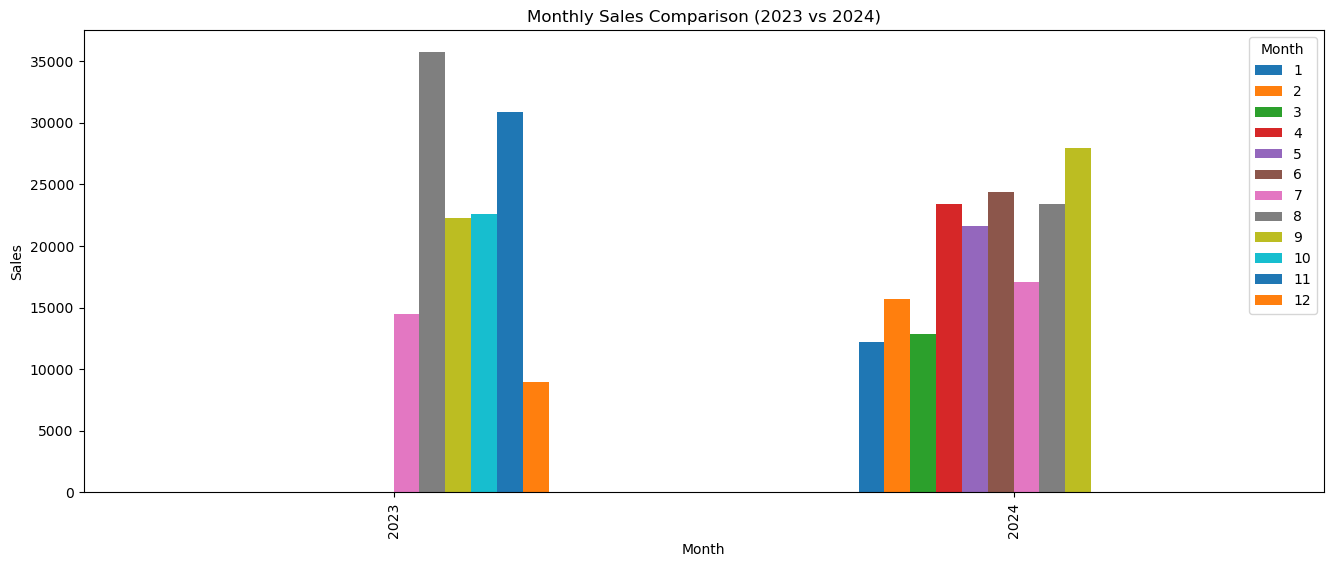

In [126]:
# Grouping data by year and month
monthly_sales = OrderData.groupby(['Year', 'Month'])['Order Total Amount'].sum().unstack()

# Plotting sales by year and month
monthly_sales.plot(kind='bar', figsize=(16,6))
plt.title('Monthly Sales Comparison (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Top 10 Best Selling Categories by Amount

In [127]:
# # Group by Category and calculate the total sales per category
best_selling_categories = OrderData.groupby('Category')['Order Total Amount'].sum().sort_values(ascending=False)

# Display the top 10 best-selling categories
print('Top 10 best selling Categories')
best_selling_categories.head(10)


Top 10 best selling Categories


Category
Adhesive Powder for DTF &amp; Plastisol Transfers,DTF &amp; Transfer Films/Adhesives,DTF/Plastisol Adhesive Powder    37341.30
Easyweed HTV 12" Yard,Heat Transfer Vinyl,HTV Yard                                                                    31296.47
Easyweed HTV 15" Yard,Heat Transfer Vinyl,HTV Yard                                                                    25836.64
Ink,Triangle Plastisol Multi-Purpose Ink                                                                              11999.57
Ink,Triangle Plastisol Inks High Opacity/Bleed Resistant Ink                                                           9401.44
Emulsion,Screen Printing Chemicals,Textil PV                                                                           7998.42
Alum. 23"x31" Screen,Screens                                                                                           7468.14
EasyWeed® Glitter HTV 20" Yard,Heat Transfer Vinyl,HTV Yard                                           

Top 10 Best Selling Products by Amount

In [128]:
# Group by product and sum the quantities sold
top_products_by_quantity = OrderData.groupby('Category')['Order Total Amount'].sum().reset_index()

# Sort by quantity in descending order and get the top 10
top_products_by_quantity = top_products_by_quantity.sort_values(by='Category', ascending=False).head(10)

print("Top 10 Best-Selling Products by Order Amount:")
print(top_products_by_quantity)


Top 10 Best-Selling Products by Order Amount:
                                             Category  Order Total Amount
144           Sublimation Ink/Paper,Sublimation Paper              388.32
143            Siser Easy Subli,Sublimation Ink/Paper               57.79
142       Siser Easy Subli Mask,Sublimation Ink/Paper               57.79
141  Screen Printing Tools,Wood Handeled Squeegee 80D              187.03
140  Screen Printing Tools,Wood Handeled Squeegee 70D              121.29
139         Screen Printing Tools,Squeegee Catch Rods              291.34
138          Screen Printing Tools,Squeegee Blade 70D              214.41
137      Screen Printing Tools,Spot/Stain Removal Gun              146.50
136  Screen Printing Tools,Screen Scrubber Refill Pad              100.32
135       Screen Printing Tools,Screen Scrubber Fused             1192.63


Machine Learning Predictions

In [129]:
# Encode categorical data
label_encoder = LabelEncoder()

OrderData['Category'] = label_encoder.fit_transform(OrderData['Category'])
OrderData['Payment Method Title'] = label_encoder.fit_transform(OrderData['Payment Method Title'])

# Features and target variable
X = OrderData[['Year', 'Month', 'Week', 'Category', 'Payment Method Title']]
y = OrderData['Order Total Amount']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training the Model

In [130]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 48454.060134856394


Future Sales Prediction - Using the trained model to predict future sales of 2025

In [131]:
# Separate LabelEncoders for each column
label_encoder_category = LabelEncoder()
label_encoder_payment = LabelEncoder()

# Fit the label encoders on the training data
categories = ['Ink', 'HTV Yard', 'Aerosols', 'Heat Transfer Vinyl']  
payment_methods = ['Credit Card', 'PayPal']

label_encoder_category.fit(categories)
label_encoder_payment.fit(payment_methods)

# Future prediction 
future_data = pd.DataFrame({
    'Year': [2025],
    'Month': [10],
    'Week': [42],
    'Category': [label_encoder_category.transform(['Ink'])[0]],  
    'Payment Method Title': [label_encoder_payment.transform(['Credit Card'])[0]]
})

# Make the prediction
future_prediction = model.predict(future_data)
print(f"Predicted Order Total for future data for 2025: {future_prediction[0]}")



Predicted Order Total for future data for 2025: 320.52744363763486
